# Multi-Model Marketing Blog Generator for PyData

This notebook demonstrates how to build a multi-agent clinical system using IntelliNode, where:

- Agent 1: Writes engaging marketing **blog post**.
- Agent 2: Generates **image description** for AI image model.
- Agent 3: Creates header **image** for the blog.
- Agent 4: Generates **voice-over** audio of the blog.

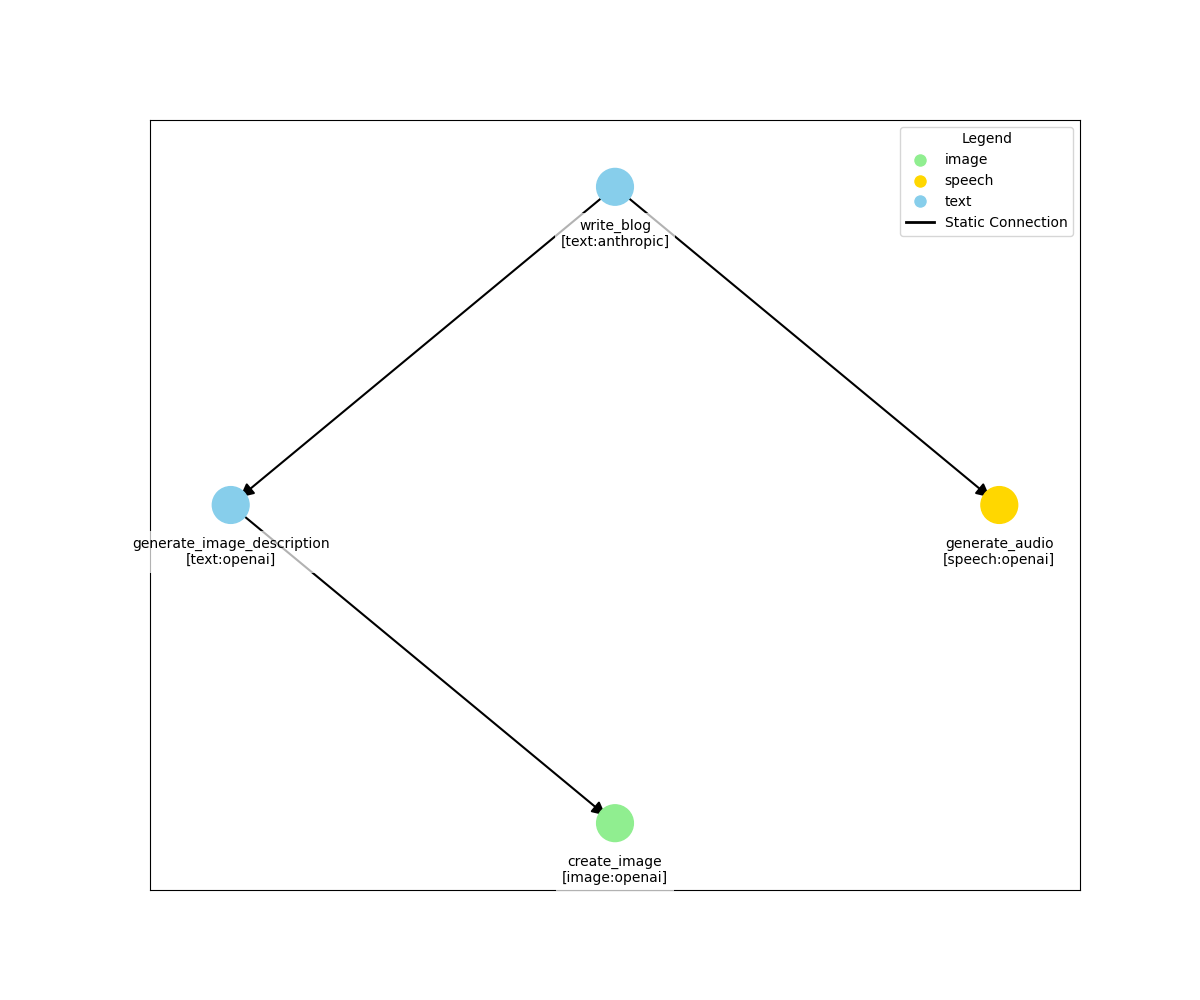

**Objectives**

In this tutorial, you will learn how to:

- Connect multiple model types (text, image, speech) in a single workflow.
- Implement parallel task execution for efficient content creation.

## Setup and Imports

In [90]:
!pip install intelli python-dotenv

In [91]:
import os
import asyncio
from dotenv import load_dotenv
from intelli.flow import Agent, Task, Flow, TextTaskInput, AgentTypes
import json

In [92]:
load_dotenv()

# Get API keys
ANTHROPIC_KEY = os.getenv("ANTHROPIC_API_KEY")
OPENAI_KEY = os.getenv("OPENAI_API_KEY")
GEMINI_KEY = os.getenv("GEMINI_API_KEY")

In [93]:
print(f"Anthropic Key: {'Available' if ANTHROPIC_KEY else 'Error to load the key'}")
print(f"Openai Key: {'Available' if OPENAI_KEY else 'Error to load the key'}")
print(f"Gemini Key: {'Available' if GEMINI_KEY else 'Error to load the key'}")

Anthropic Key: Available
Openai Key: Available
Gemini Key: Available


In [94]:
OUTPUT_DIR = "./output"

## Blog Topic

Define a marketing blog topic about PyData conference.

In [95]:
blog_topic = """
Topic: Why PyData London 2025 is the Must-Attend Event for Data Scientists.
Target Audience: Data scientists, ML engineers, Python developers.
Include: Networking opportunities, learning benefits.
"""

## Create Agents
Set up four specialized agents for content, image description, visuals, and audio.

In [96]:
# Agent 1: Blog Writer (Anthropic Claude)
blog_writer = Agent(
    agent_type=AgentTypes.TEXT.value,
    provider="anthropic",
    mission="Write engaging marketing blog posts for tech conferences",
    model_params={
        "key": ANTHROPIC_KEY,
        "model": "claude-sonnet-4-20250514",
        "max_tokens": 2000
    }
)

In [97]:
# Agent 2: Image Description Generator (OpenAI)
image_description_gen = Agent(
    agent_type=AgentTypes.TEXT.value,
    provider="openai",
    mission="Generate concise and descriptive image prompts for AI image generation models",
    model_params={
        "key": OPENAI_KEY,
        "model": "gpt-4o",
        "max_tokens": 200
    }
)

In [98]:
# Agent 3: Image Generator
image_creator = Agent(
    agent_type=AgentTypes.IMAGE.value,
    provider="openai",
    mission="Generate a professional header image",
    model_params={
        "key": OPENAI_KEY,
        "model": "dall-e-3", # "gpt-image-1"
        "imageSize": "1024x1024",
        "quality": "standard"
    }
)

In [99]:
# Agent 4: Voice Synthesizer (OpenAI)
voice_synthesizer = Agent(
    agent_type=AgentTypes.SPEECH.value,
    provider="openai",
    mission="Generate professional voice-over for blog content",
    model_params={
        "key": OPENAI_KEY,
        "model": "tts-1",
        "voice": "alloy"
    }
)

In [100]:
print("✓ All four agents created successfully")

✓ All four agents created successfully


## Create Tasks

Define tasks for each agent with appropriate prompts.

In [101]:
# Task 1: Write the blog post
write_task = Task(
    TextTaskInput(f"""
    Write an engaging marketing blog post on:

    {blog_topic}

  Structure the blog with:
    - Compelling introduction that hooks the reader.
    - 3-4 main sections with clear subheadings.
    - Supporting evidence, examples, or data points.
    - Strong conclusion with a call to action.

    Target: 300 words
    Tone: Professional yet conversational
    Make it informative, engaging, and actionable.
    """),
    blog_writer,
    log=True
)

In [102]:
# Task 2: Generate image description
image_description_task = Task(
    TextTaskInput("""
    Generate a short image description for an AI image model from the provided blog text topic.

    Create a concise, visual description (2-3 sentences) that captures:
    - The main theme and atmosphere of the blog content
    - No text in the image.
    """),
    image_description_gen,
    log=True
)

In [103]:
# Task 3: Generate blog header image using the description
image_task = Task(
    TextTaskInput("Generate an image based on the description"),
    image_creator,
    log=True
)

In [104]:
# Task 4: Generate voice-over audio
audio_task = Task(
    TextTaskInput(""),
    voice_synthesizer,
    log=True
)

In [105]:
print("✓ All tasks defined")

✓ All tasks defined


## Create Flow
Connect agents with the blog content flowing to the voice synthesizer.

In [106]:
flow = Flow(
    tasks={
        "write_blog": write_task,
        "generate_image_description": image_description_task,
        "create_image": image_task,
        "generate_audio": audio_task
    },
    map_paths={
        "write_blog": ["generate_image_description", "generate_audio"],
        "generate_image_description": ["create_image"],
    },
    log=True,
    # --- optional - save output parameters --- #
    auto_save_outputs=True,
    output_dir=OUTPUT_DIR,
)

### Generate Flow Visualization

In [107]:
flow.generate_graph_img(
    name="multi_model_flow",
    save_path=OUTPUT_DIR
)

'./output/multi_model_flow.png'

### Run the Flow

Execute all agents and display the multimodal results.

In [108]:
async def run_flow():
    """Execute the flow asynchronously"""
    results = await flow.start(max_workers=3)
    return results

In [109]:
# Execute the run
results = await run_flow()

---- Execute task write_blog (text/anthropic) ----
- The task output head: : # Why PyData London 2025 is the Must-Attend Event for Data Scientists

Are you tired of learning Python tricks from YouTube tutorials while your career feels stuck in neutral? It's time to level up. P
Task write_blog executed successfully
📄 Auto-saved text from task 'write_blog' to ./output/write_blog_output.txt
Task write_blog output type: text
---- Execute task generate_image_description (text/openai) ----
Task text expects input type: text
Found matching input type with 1 outputs
---- Execute task generate_audio (speech/openai) ----
Task speech expects input type: text
Found matching input type with 1 outputs
- Inside the task with input data head: : # Why PyData London 2025 is the Must-Attend Event for Data Scientists

Are you tired of learning Python tricks from YouTube tutorials while your career feels stuck in neutral? It's time to level up. P
- Input data with template: : PREVIOUS_ANALYSIS: {0}
CURRENT